In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']  = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
#Load data

In [3]:
df = pd.read_csv(r"C:\Users\sunny\Desktop\DS Material\Data Set\Mall_Data.csv", index_col=0)
df

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [4]:
df.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

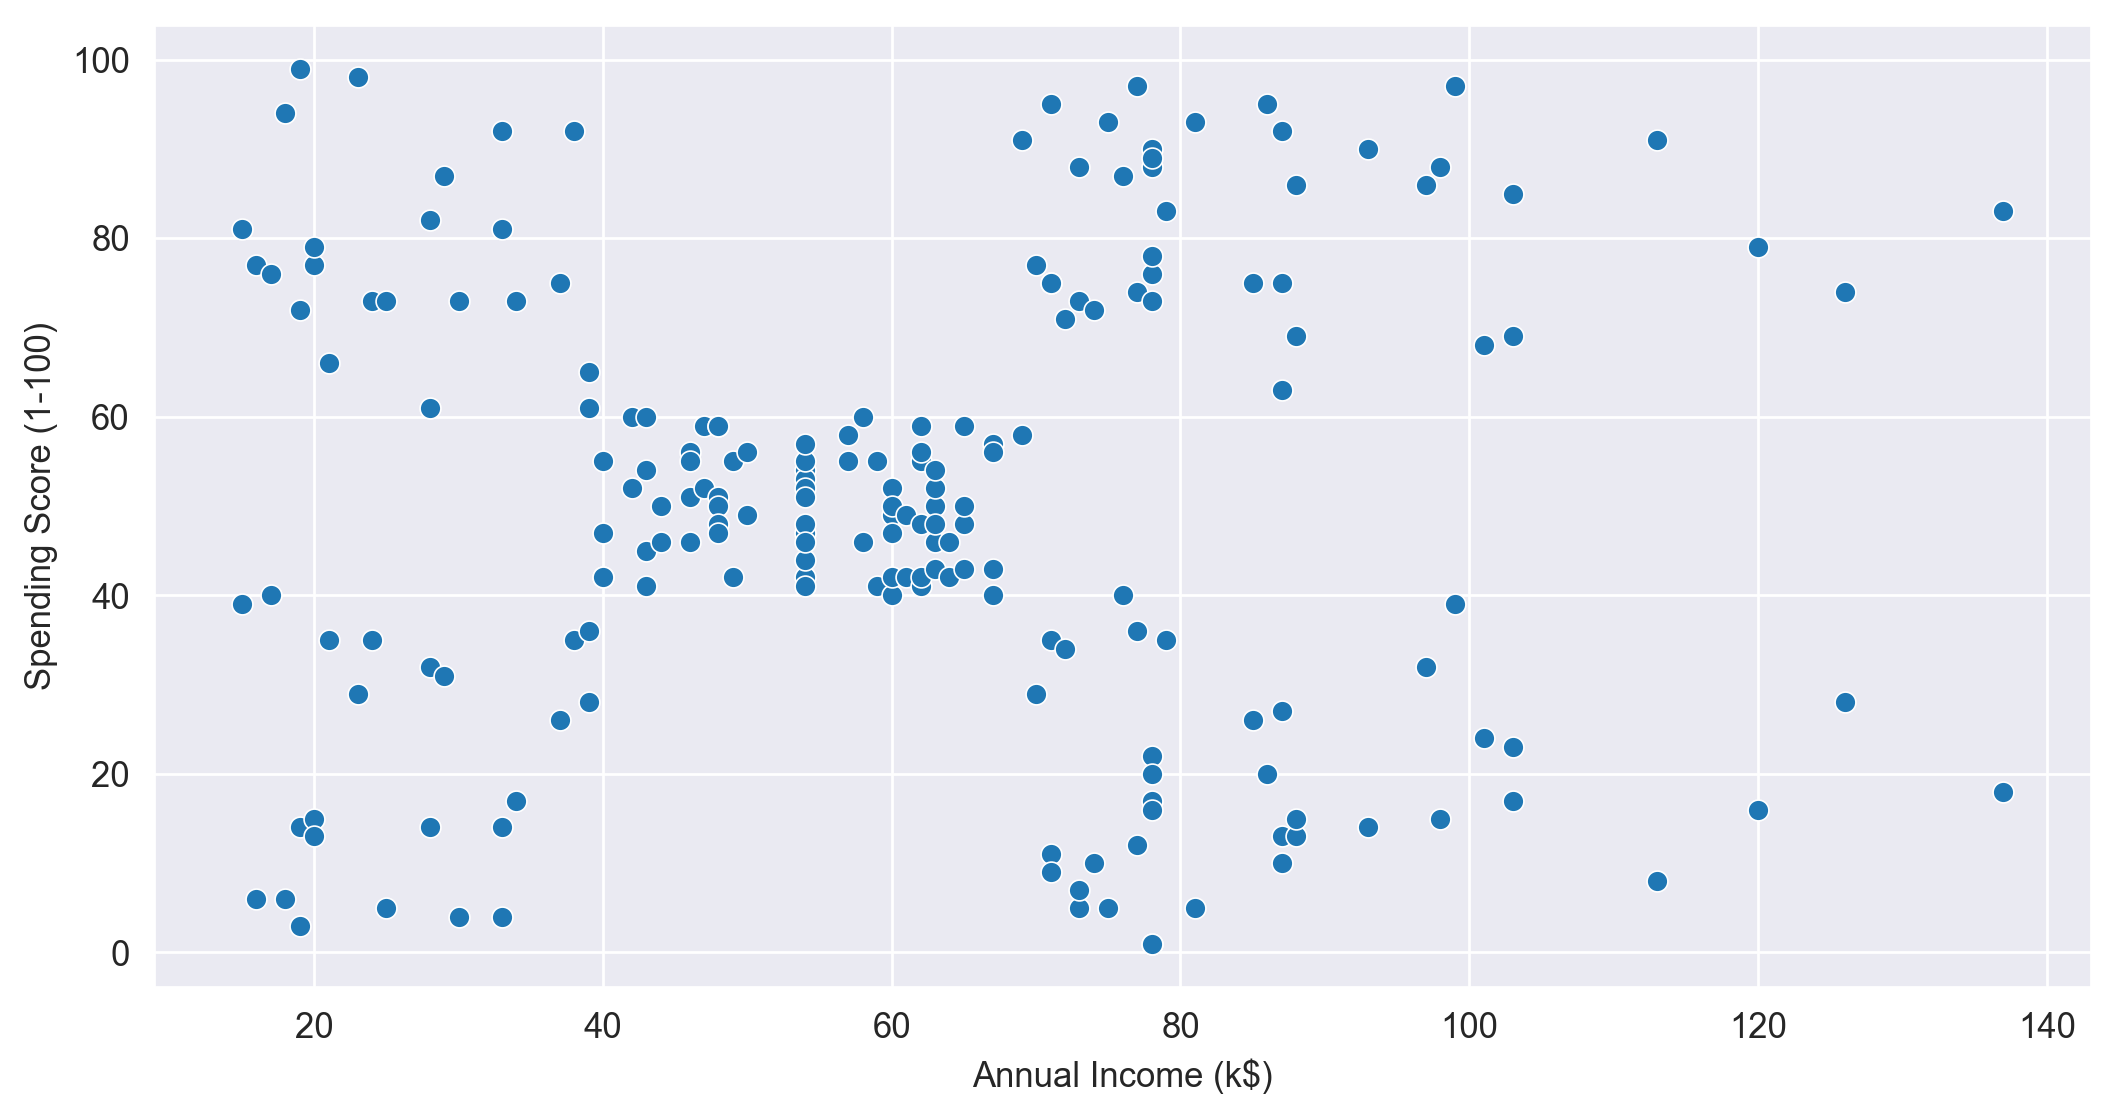

In [5]:
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [6]:
#Standardization
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [7]:
#Model Building

In [8]:
km = KMeans()
y = km.fit_predict(x)

# We dont have target column so we directly do fit predict option

In [9]:
#cluster centre
km.cluster_centers_

# It gives us two coordinate x and y

array([[-0.50630013,  0.0469388 ],
       [ 1.87564575,  1.23452563],
       [ 0.7489536 , -1.45651437],
       [-1.35366972,  1.15873115],
       [-1.35185213, -1.19089759],
       [ 0.68673384,  1.241219  ],
       [ 0.1206509 , -0.15673077],
       [ 1.87564575, -1.09476801]])

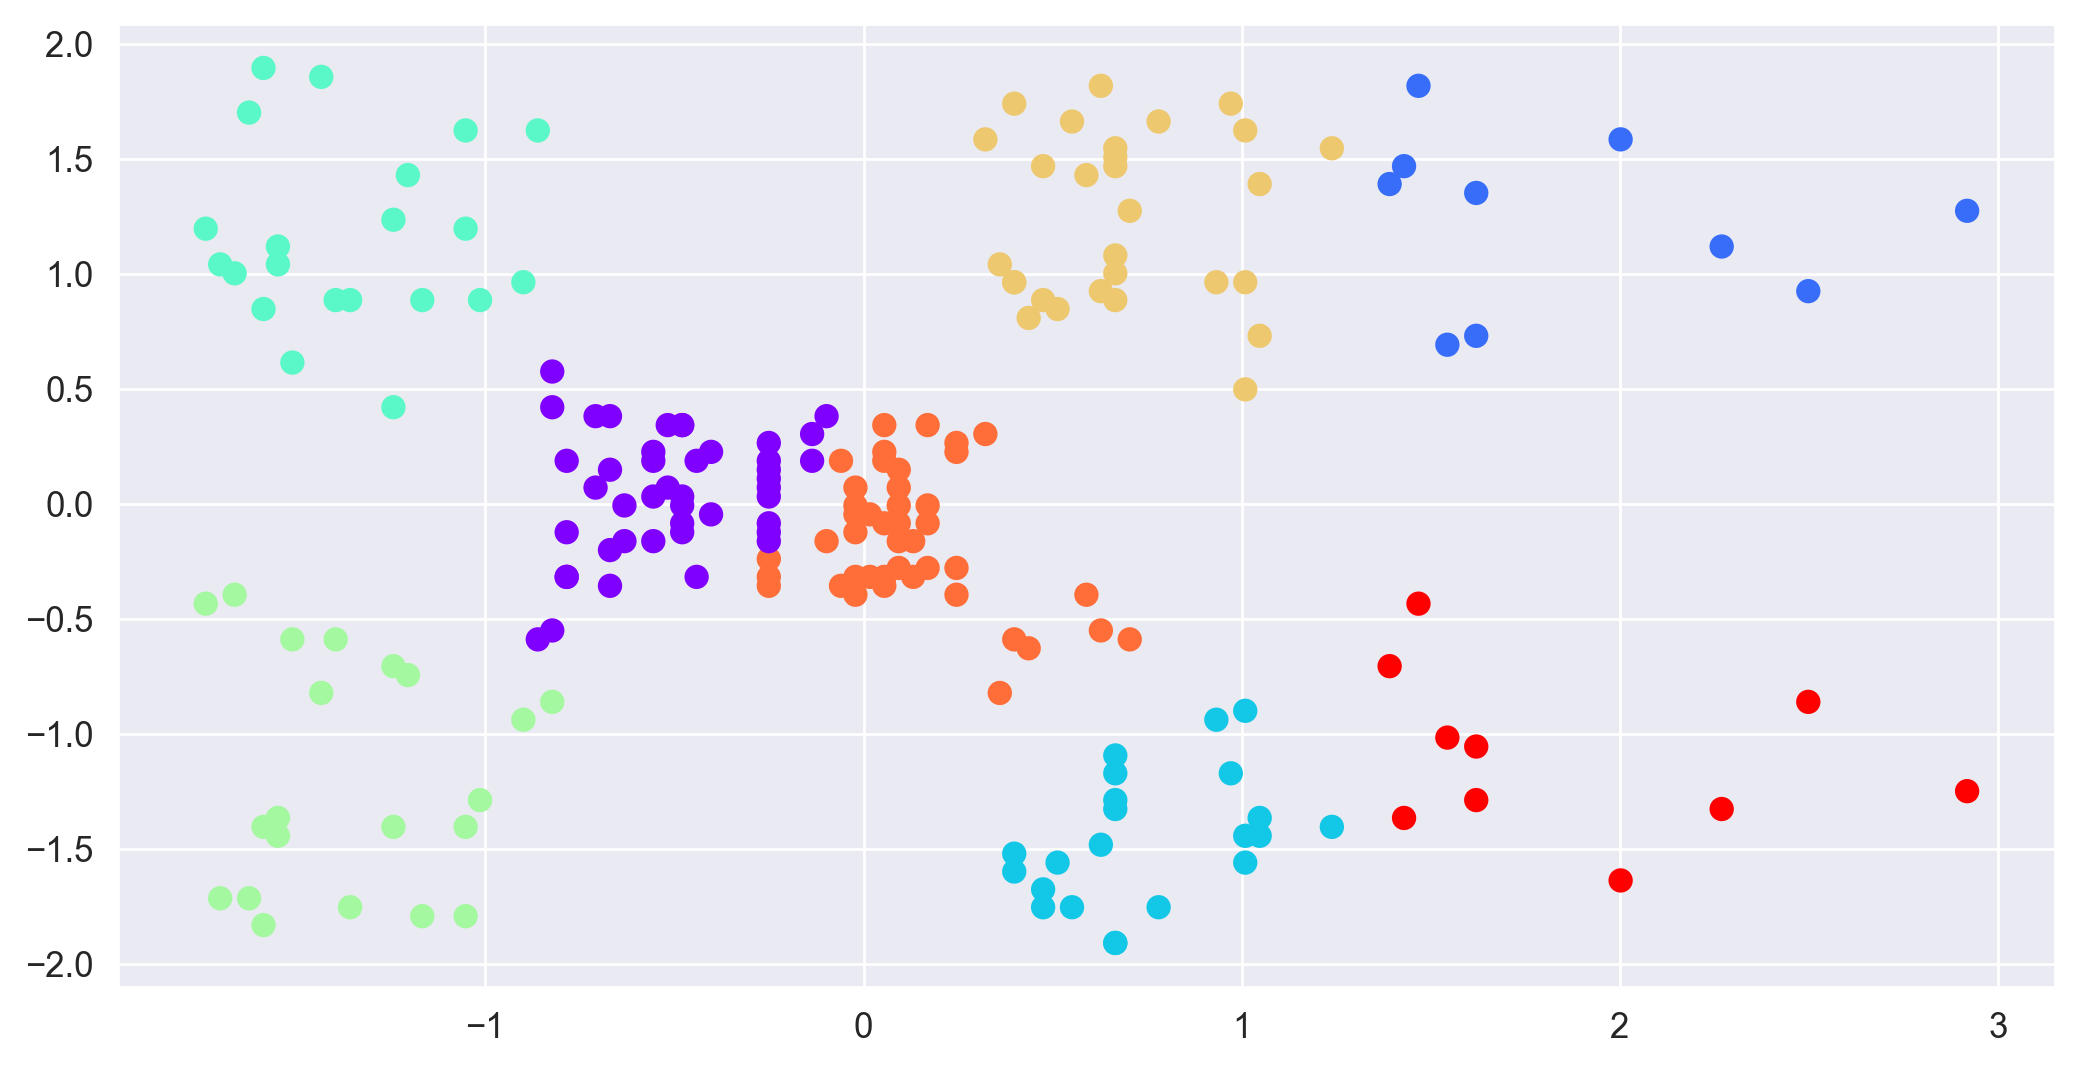

In [10]:
#Visualize the clusters
plt.scatter(x[:,0],x[:,1],c = y, cmap='rainbow')

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
silhouette_score(x,y)

0.45644093438859246

# Elbow graph 

In [13]:
# To find out optimal value for cluster we do hyperparameter tuning
#wcss = Within cluster sum of square

wcss = []

for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [14]:
wcss
# After 5th point the difference is very less
#But for more understanding we plot line graph

[399.99999999999994,
 269.69101219276394,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.057348270386,
 44.86628627232253,
 37.285287694508284,
 32.37525368158286,
 29.19696027141991,
 25.880869492333016,
 24.329694077291524,
 21.272734384998547,
 18.951530381722865,
 17.65925607739057,
 16.468227383139432,
 15.333372162046143,
 13.983675908554485,
 12.867161767330469]

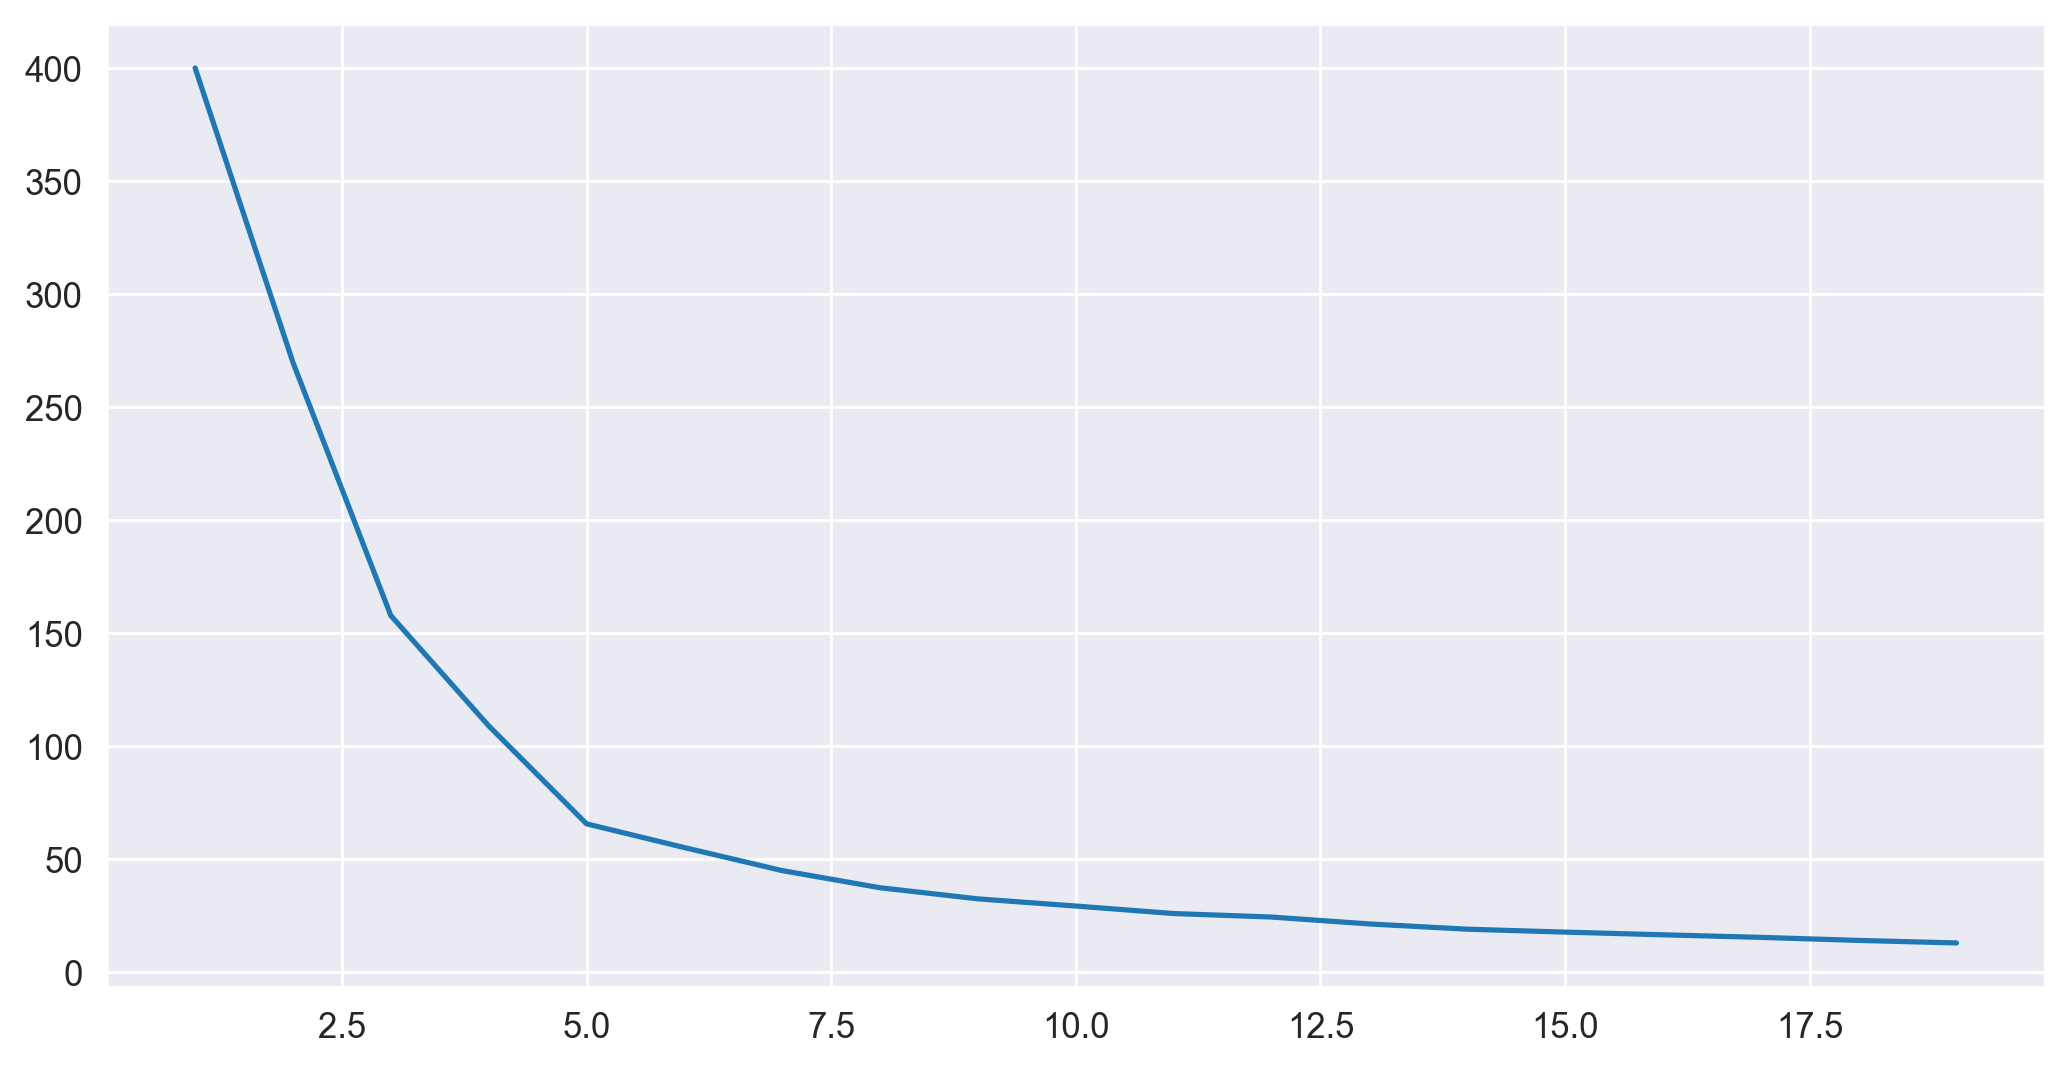

In [15]:
plt.plot(range(1,20),wcss)

-  In above graph there is drastic change in after 5th point
- No of optimal k value in that case is 5

# Final Model

In [28]:
km = KMeans(n_clusters=5)
ypred = km.fit_predict(x)
ypred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 4,
       2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1,
       4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

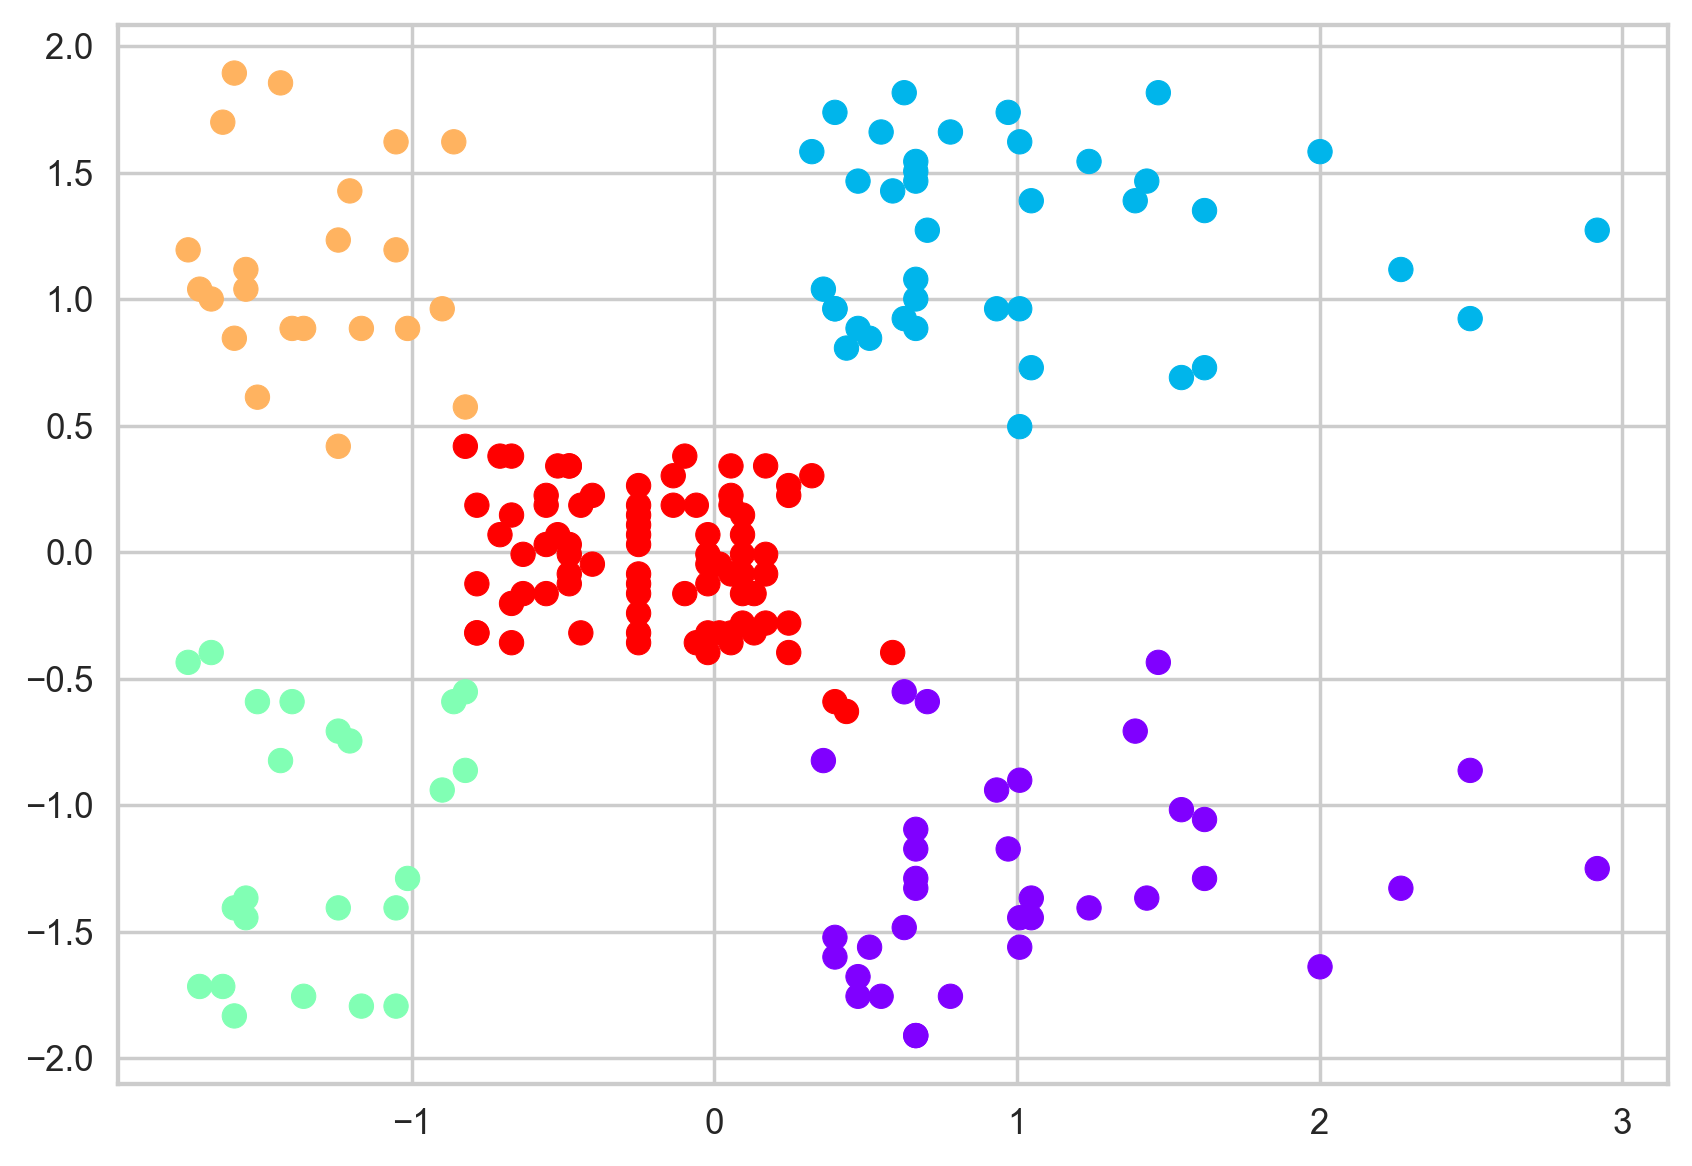

In [29]:
plt.scatter(x[:,0],x[:,1],c = ypred, cmap='rainbow')

In [44]:
# If we want to show the centroids

centers = km.cluster_centers_
centers

array([[ 1.05500302, -1.28443907],
       [ 0.99158305,  1.23950275],
       [-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788],
       [-0.20091257, -0.02645617]])

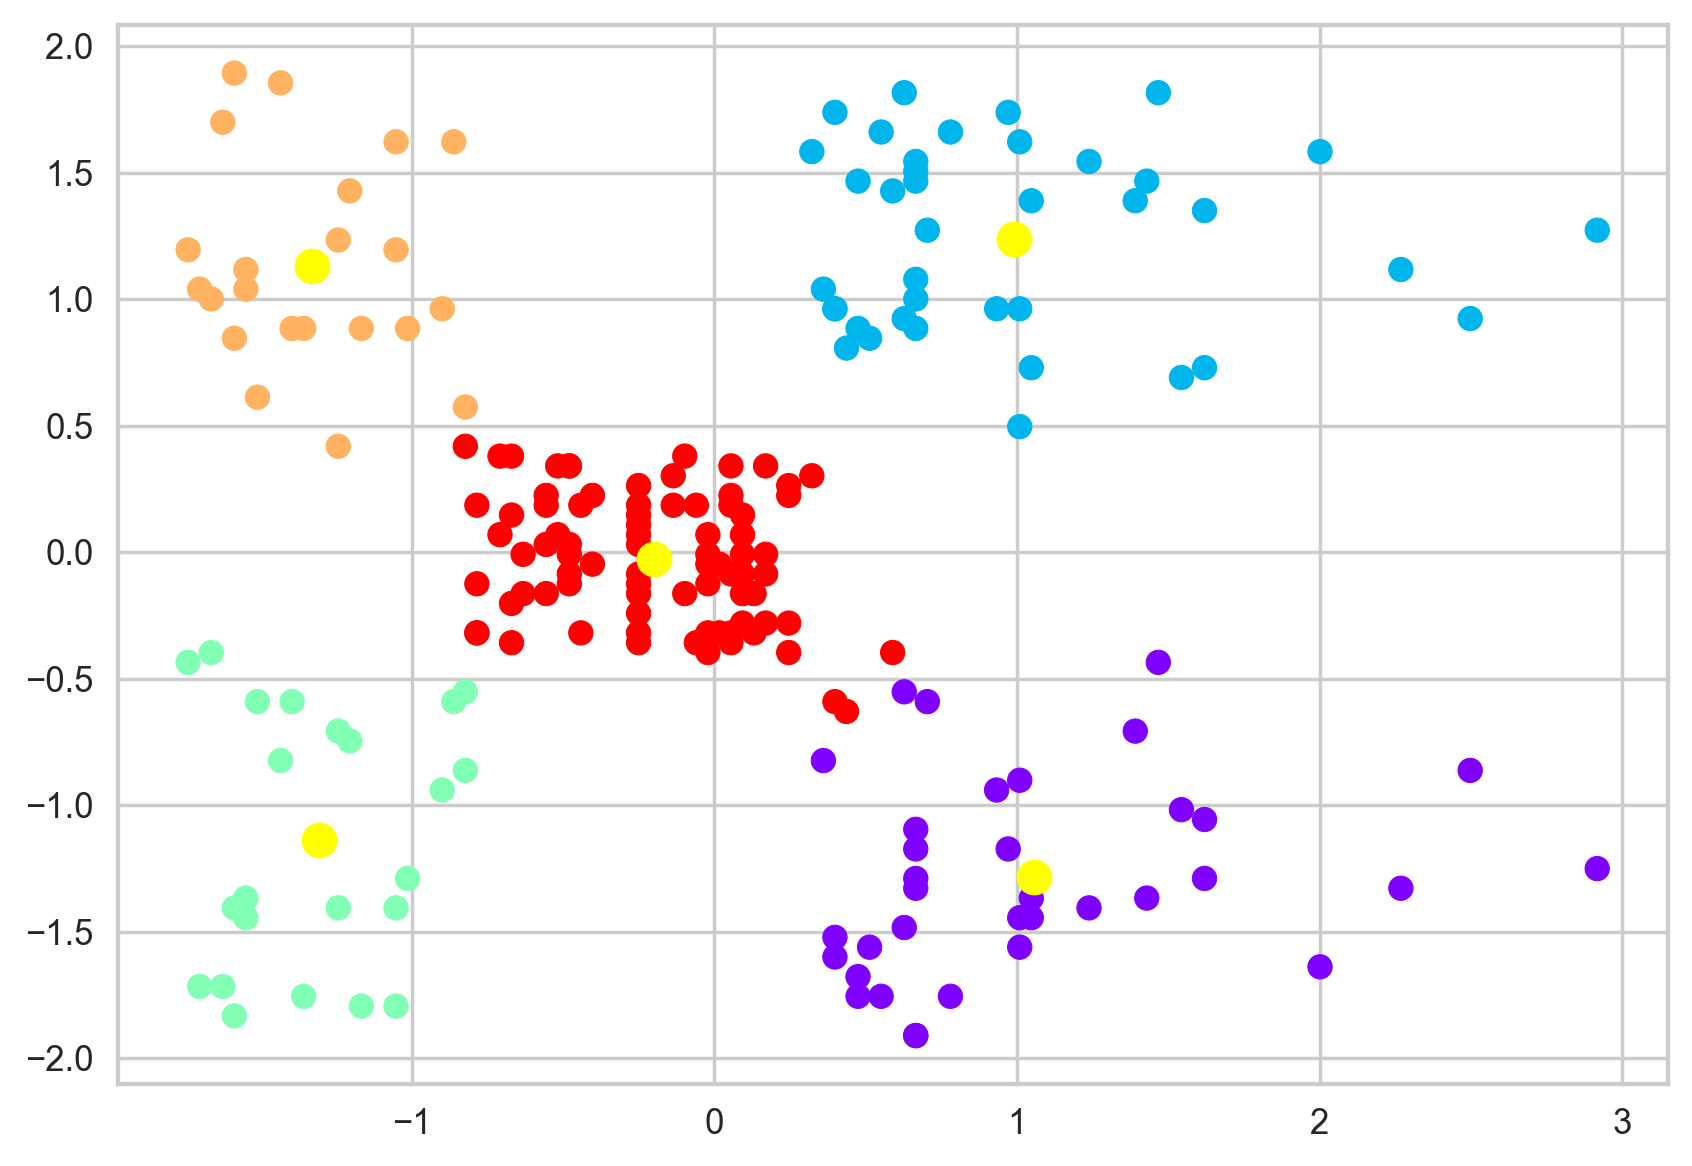

In [45]:
plt.scatter(x[:,0],x[:,1],c = ypred, cmap='rainbow')
plt.scatter(centers[:,0], centers[:,1],color = 'yellow',s=100)

In [46]:
silhouette_score(x,ypred)

0.5546571631111091

# Evaluation of Kmeans

<code> **STEP 1:** </code>
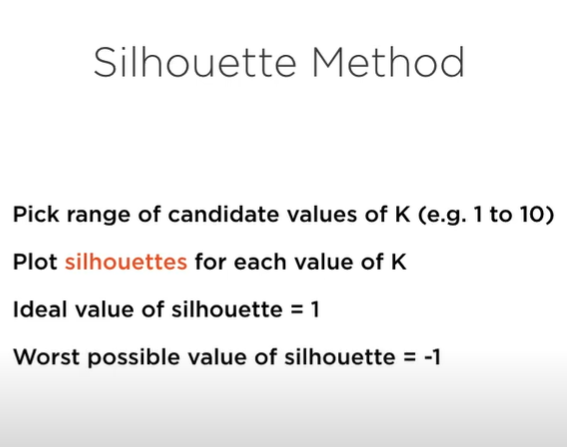


<code>**STEP 2**</code>
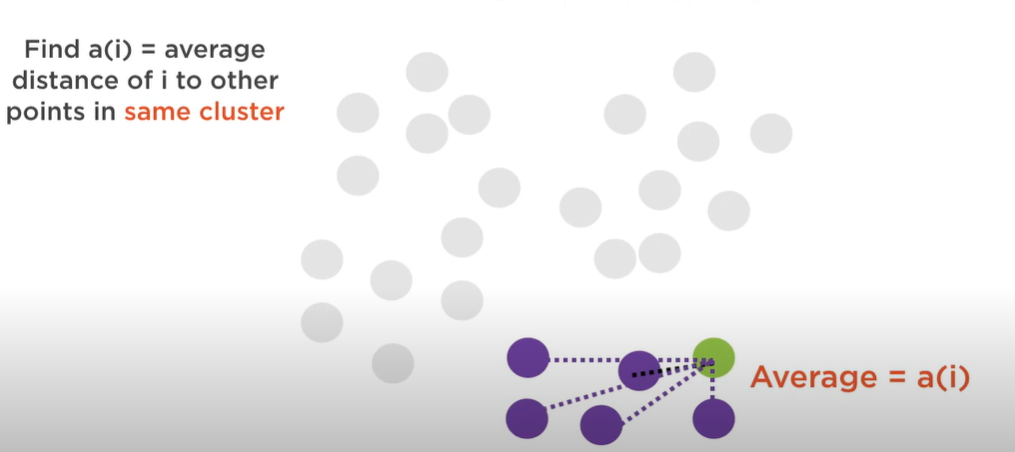

<code>**STEP 3**</code>
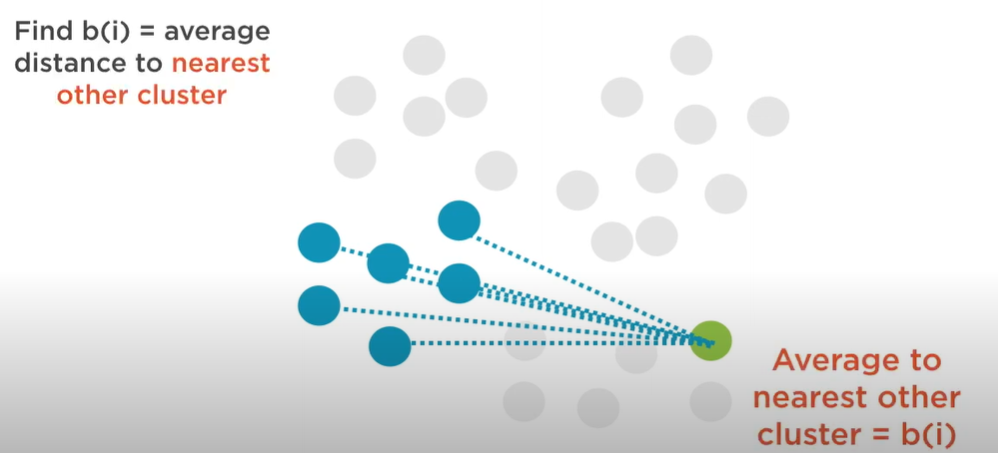

<code>**STEP 4:** </CODE>
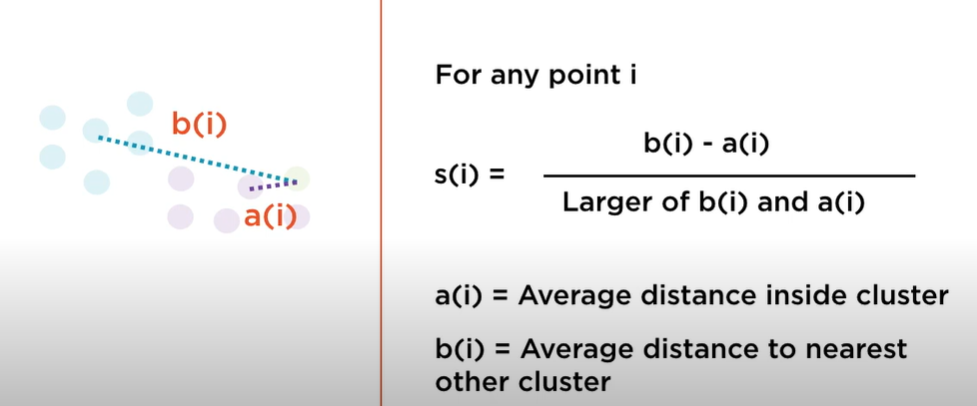

In [21]:
from yellowbrick.cluster import SilhouetteVisualizer

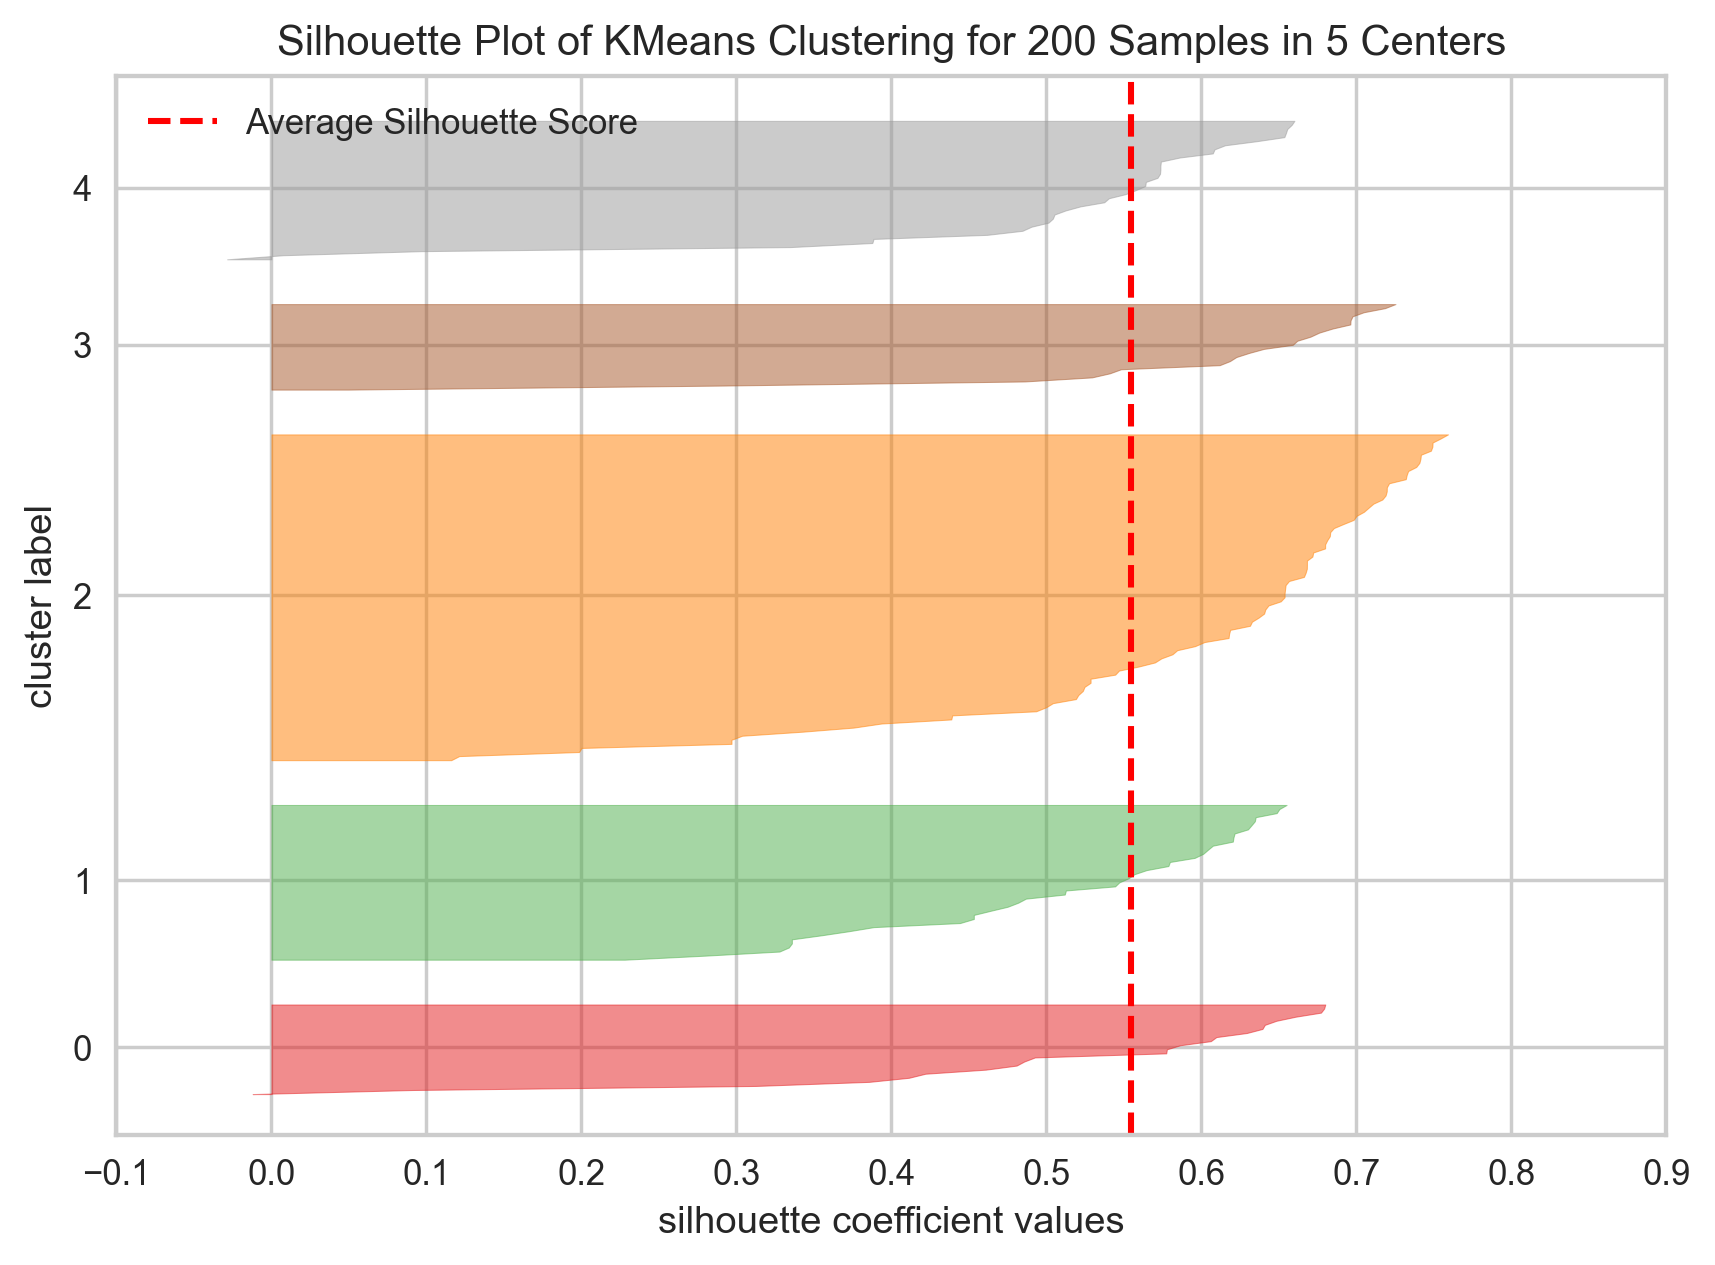

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [22]:
model = SilhouetteVisualizer(KMeans(n_clusters=5))
vis = model.fit(x)
vis.show()

- Above graph represents
- Width of each been represents the number of datapoint belongs to that particular cluster
- More the width of been larger the no of data in that cluster
- Width of cluster no 2 is very high so majority of the datapoint is belong to cluster no 2

In [47]:
sil_score = []

for i in range(2,20):
    km = KMeans(n_clusters=i)
    y = km.fit_predict(x)
    sil_score.append(silhouette_score(x,y))

In [48]:
sil_score

[0.3146990432802128,
 0.46658474419000145,
 0.4939069237513199,
 0.5546571631111091,
 0.5398800926790663,
 0.5263454490712252,
 0.45644093438859246,
 0.45643685292964165,
 0.4476280825932578,
 0.43664804614471914,
 0.44166951162726137,
 0.45139755762433653,
 0.43267558481321844,
 0.4282661333919592,
 0.4282299346125791,
 0.4282207056580241,
 0.4035916779536998,
 0.41745433202216875]

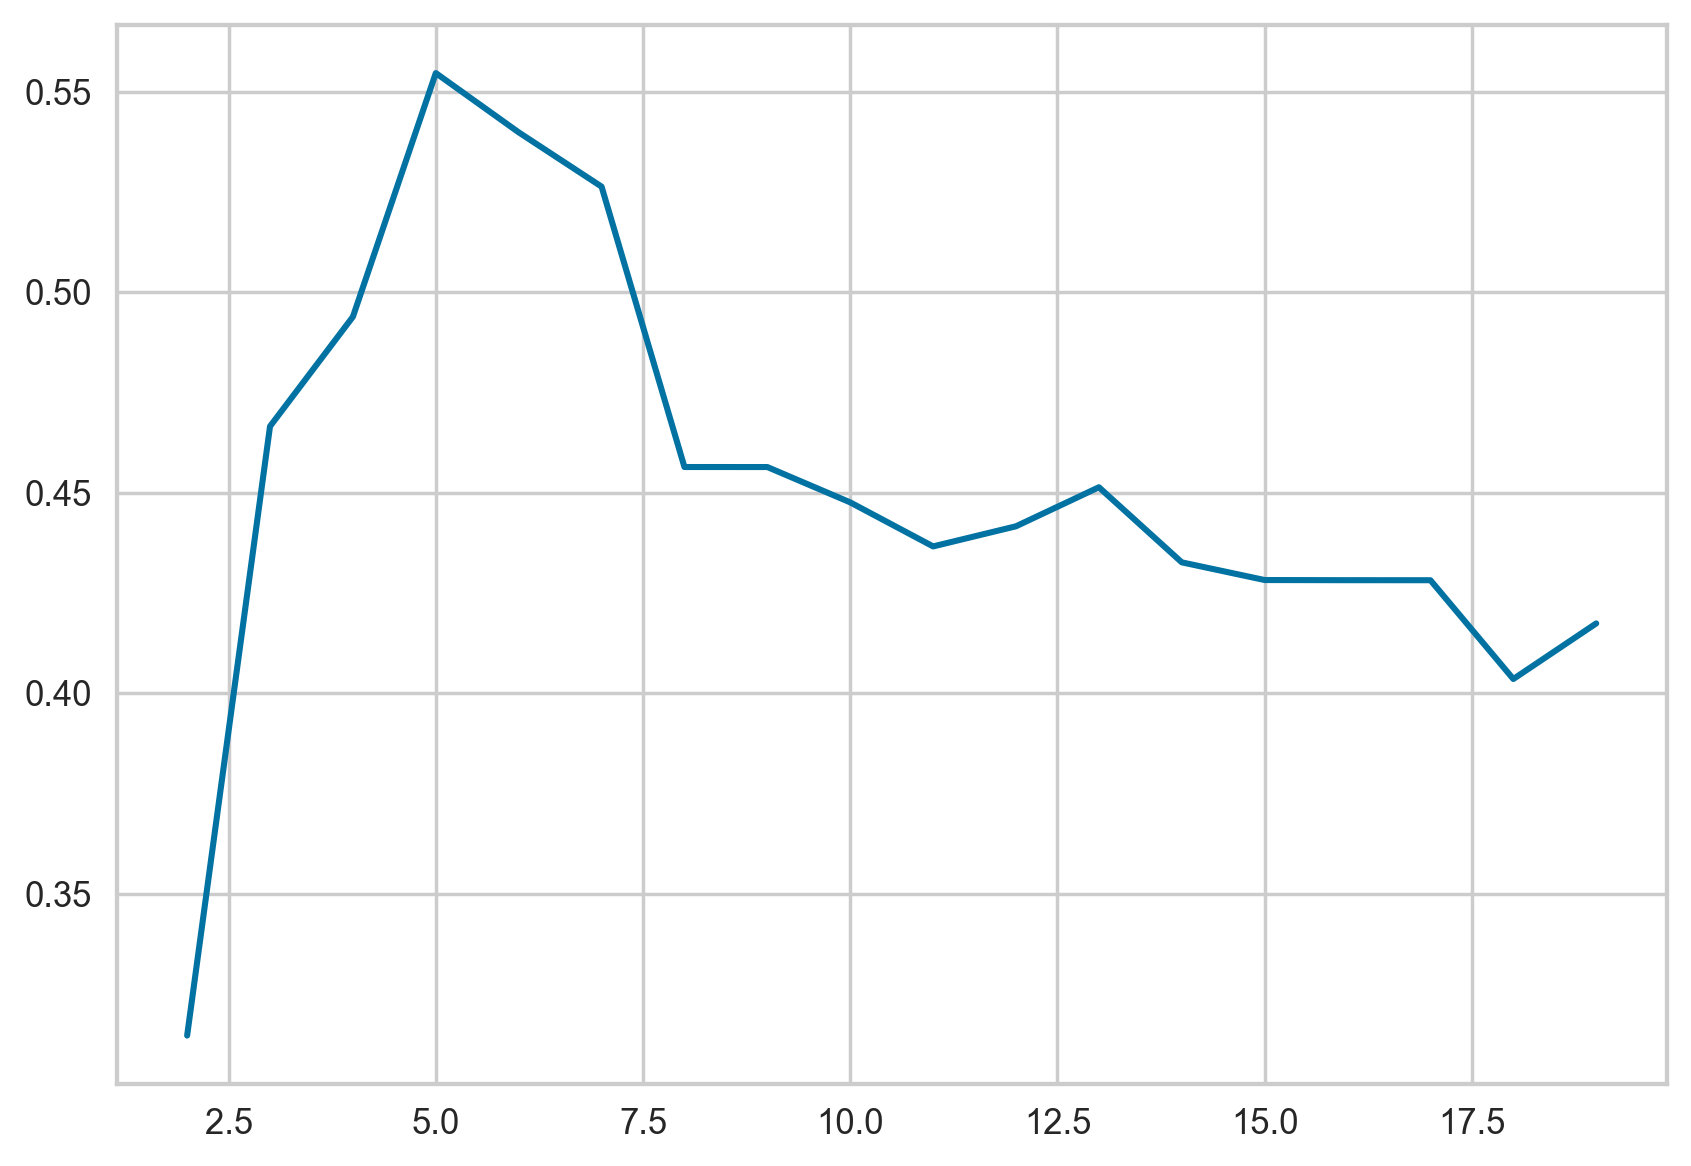

In [49]:
plt.plot(range(2,20),sil_score)

- Maximum sil score is 0.55 @ 5th k value

In [52]:
df['cluster'] = ypred
df

,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,
1,15,39,2
2,15,81,3
3,16,6,2
4,16,77,3
5,17,40,2
...,...,...,...
196,120,79,1
197,126,28,0
198,126,74,1


In [60]:
df.groupby('cluster').agg('mean')

,Annual Income (k$),Spending Score (1-100)
cluster,,
0,88.200000,17.114286
1,86.538462,82.128205
2,26.304348,20.913043
3,25.727273,79.363636
4,55.296296,49.518519


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [62]:
x = df.loc[:,'Annual Income (k$)':'Spending Score (1-100)']
y = df['cluster']

In [65]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=0)

In [67]:
lg = LogisticRegression()

model = lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

ypred


array([2, 0, 4, 4, 1, 0, 3, 0, 2, 0, 4, 1, 0, 0, 4, 3, 3, 0, 3, 4, 1, 1,
       3, 1, 4, 1, 1, 1, 4, 2, 2, 4, 0, 4, 2, 1, 1, 2, 4, 4])

In [68]:
from sklearn.metrics import  classification_report

In [71]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

